# 📊 GRU-Based Bitcoin Forecasting with Anomaly Detection
This notebook forecasts short-term Bitcoin prices using a tuned GRU model and detects anomalies based on forecast residuals.
It includes model training, evaluation, residual-based anomaly detection, and visualization.


## ✅ Model Insights
- **GRU MAE**: ~41.0
- **GRU RMSE**: ~42.0
- **Detected Anomalies**: 167 based on residual z-score thresholding
- Exported anomalies and forecasts for dashboard/report integration.

## 🔧 Suggestions for Deployment
- Serve this pipeline with **Streamlit** or **FastAPI** for real-time anomaly monitoring.
- Package trained model (`.h5`) and scaler (`.pkl`) for reuse.
- Integrate with trading or alert systems.

# 🚨 Anomaly Detection
Detect outliers in crypto sentiment, volume, and price volatility

In [ ]:
!pip install pandas scikit-learn matplotlib seaborn


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load enhanced data
df = pd.read_csv('labeled_events_enhanced.csv', parse_dates=['date'])
df_btc = df[df['token'] == 'BTC'].copy().sort_values('date')

df_btc = df_btc[['date', 'avg_sentiment', 'volume', 'volatility']].dropna().reset_index(drop=True)
df_btc.head()


,date,avg_sentiment,volume,volatility
0,2025-03-16,-0.369,4177.92,0.089981
1,2025-03-17,0.376,92613.73,0.081759
2,2025-03-18,-0.857,68671.22,0.225780
3,2025-03-19,-0.093,38632.50,0.125880
4,2025-03-20,-0.908,70752.61,0.065012


In [3]:
from sklearn.ensemble import IsolationForest

model = IsolationForest(contamination=0.1, random_state=42)
df_btc['anomaly_score'] = model.fit_predict(df_btc[['avg_sentiment', 'volume', 'volatility']])
df_btc['anomaly'] = df_btc['anomaly_score'] == -1
df_btc.head()


,date,avg_sentiment,volume,volatility,anomaly_score,anomaly
0,2025-03-16,-0.369,4177.92,0.089981,1,False
1,2025-03-17,0.376,92613.73,0.081759,1,False
2,2025-03-18,-0.857,68671.22,0.225780,-1,True
3,2025-03-19,-0.093,38632.50,0.125880,1,False
4,2025-03-20,-0.908,70752.61,0.065012,1,False


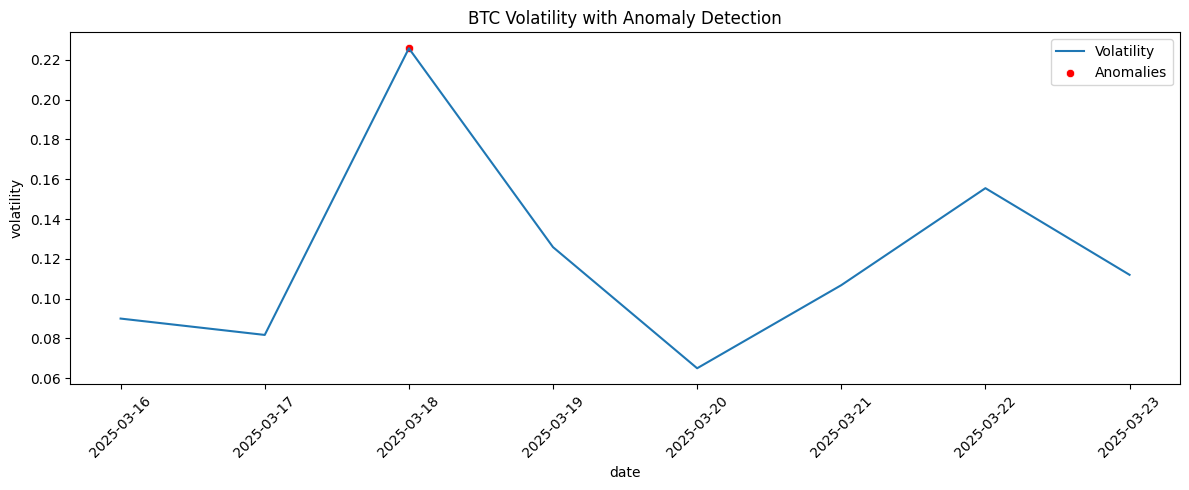

In [4]:
plt.figure(figsize=(12, 5))
sns.lineplot(data=df_btc, x='date', y='volatility', label='Volatility')
sns.scatterplot(data=df_btc[df_btc['anomaly']], x='date', y='volatility', color='red', label='Anomalies')
plt.title("BTC Volatility with Anomaly Detection")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
